In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from matplotlib.colors import ListedColormap

#from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

In [139]:
def label(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        # Verificar se a coluna é do tipo 'object' (categórica)
        if dataframe[column].dtype == 'object':
            # Aplicar a codificação LabelEncoder à coluna
            dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

In [140]:
dt = pd.read_csv("merged_data.csv")
label(dt)

,Title,Type,ReleaseYear,FinalYear,Network,Label/Studio,Genre,Rating,Adaptation,CriticScore,Artist,ReleaseMonth,Director,Runtime,NumOfCriticReviews
0,113,2,2011,13,13,195,29,10,1,1,48,8,55,72,39
1,52,2,2008,8,2,167,27,10,8,1,48,8,55,72,39
2,107,2,1994,2,16,195,13,11,8,2,48,8,55,72,39
3,388,2,1999,5,13,195,27,10,8,1,48,8,55,72,39
4,258,2,2016,16,17,122,53,3,1,2,48,8,55,72,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,390,1,2013,17,19,7,77,7,7,2,48,1,30,67,27
902,232,1,2012,17,19,69,13,7,7,2,48,5,10,61,17
903,173,1,2011,17,19,138,77,6,7,3,48,10,16,63,23
904,274,1,2011,17,19,71,77,6,7,0,48,5,23,60,15


In [141]:
X = dt.loc[:, dt.columns != 'CriticScore'].values
y = dt['CriticScore'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [142]:
myknn = KNeighborsClassifier(n_neighbors=5)
fit = myknn.fit(X_train, y_train)
pred = myknn.predict(X_test)

In [143]:
accuracy_score(y_test, pred)

0.5330882352941176

### Confusion Matrix

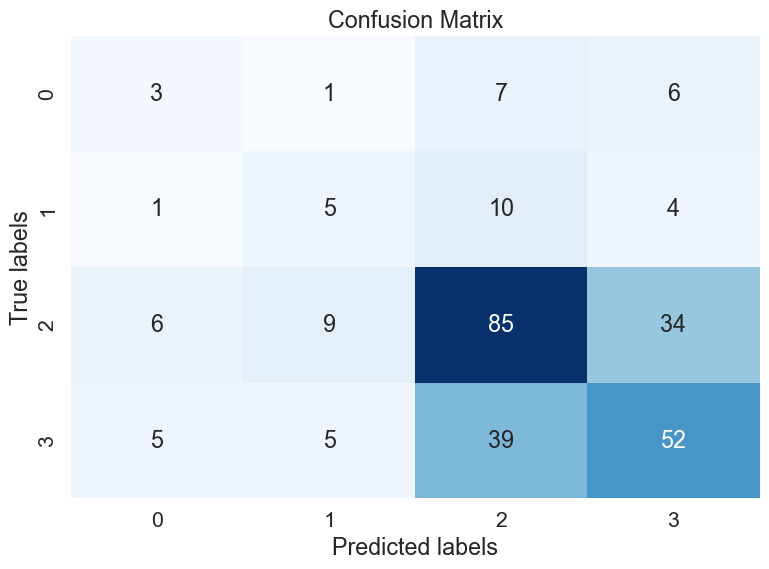

In [144]:
cm_sklearn = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)

sns.heatmap(cm_sklearn, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

### Classification Report

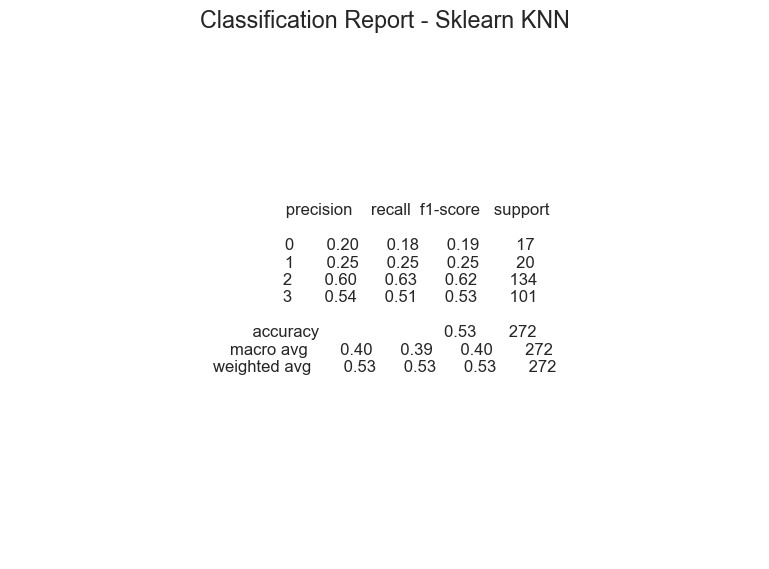

In [145]:
report = classification_report(y_test, pred)

plt.figure(figsize=(8, 6))

plt.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off')
plt.title('Classification Report - Sklearn KNN')

plt.tight_layout()
plt.show()


### Find the best knn according to the accuracy score

Nao sei se esta bem, acho que nao...

In [146]:
def find_k_knn(X, y, k_max):
    k_values = range(1, k_max + 1)
    scores = []

    for i in k_values:
        knn = myknn
        score = np.mean(cross_val_score(knn, X, y, cv=5,scoring='accuracy'))
        scores.append(score)

    # Plotting the results
    plt.plot(k_values, scores, marker='o')
    plt.xlabel("k Values")
    plt.ylabel("Cross-Validation Accuracy Score")
    plt.title("Finding the Best k for KNN")
    plt.show()

    print("Best k for knn: ", k_values[np.argmax(scores)])

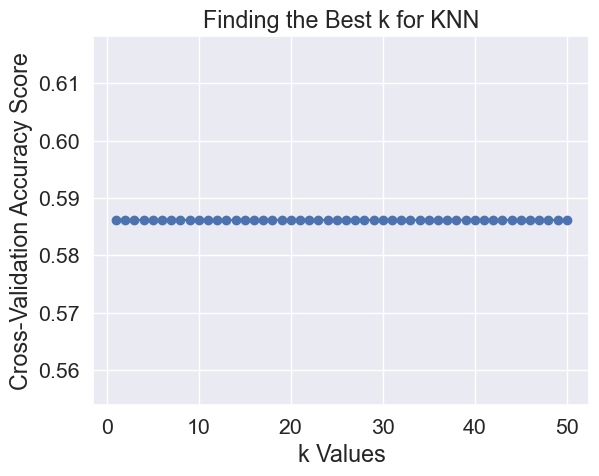

Best k for knn:  1


In [147]:
find_k_knn(X,y,50)

### Comparar os dois algoritmos

Nao esta para knn e arvore de decisao, mas é esta funcao!

In [148]:
# k-fold-for10folds
# Define the number of folds and create the K-Fold object

def k_fold_cross_validation(model,Xtrain,Xtest,ytrain,ytest,X,y,k):

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Create a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X1):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]

        # Create and fit the KNN classifier
        kn = model(3)
        kn.fit(Xtrain, ytrain)

        # Make predictions on the test set
        ypred = kn.predict(Xtest)

        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(ytest, ypred)
        accuracy_scores.append(accuracy)
    
    return accuracy_scores

def show_fold_cross_validation(knn_accuracy, wknn_accuracy):
    fig, ax = plt.subplots()
    ax.boxplot([knn_accuracy, wknn_accuracy])
    ax.set_xticklabels(['KNN', 'WKNN'])
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Scores of K-Fold Cross-Validation for KNN and WKNN')
    plt.show()

def show_mean_dev(knn_accuracy, wknn_accuracy):
    # KNN
    mean_accuracy_knn = np.mean(knn_accuracy)
    std_accuracy_knn = np.std(knn_accuracy)
    
    # WKNN
    mean_accuracy_wknn = np.mean(wknn_accuracy)
    std_accuracy_wknn = np.std(wknn_accuracy)
    
    # Plot both
    fig, ax = plt.subplots()
    ax.bar(['KNN', 'WKNN'], [mean_accuracy_knn, mean_accuracy_wknn], yerr=[std_accuracy_knn, std_accuracy_wknn])
    ax.set_ylabel('Accuracy')
    ax.set_title('Mean Accuracy and Standard Deviation Comparison')
    
    # Add mean and std text at the bottom of the bars
    ax.text(0, 0.05, f'Mean: {mean_accuracy_knn:.2f}\nStd: {std_accuracy_knn:.2f}', ha='center')
    ax.text(1, 0.05, f'Mean: {mean_accuracy_wknn:.2f}\nStd: {std_accuracy_wknn:.2f}', ha='center')
    
    plt.show()